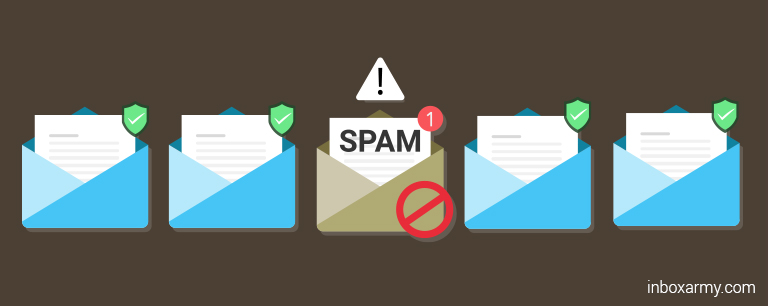

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('messages.csv')
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


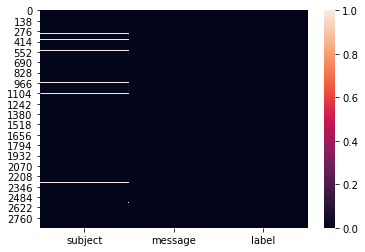

In [4]:
# checking missing values
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [7]:
# drop row which contain null value
df=df.dropna(how='any')
df.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0  
5  content - length : 4437 call for papers is the...      0

In [8]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [9]:
df.shape

(2831, 3)

In [10]:
df['label'].value_counts()

0    2363
1     468
Name: label, dtype: int64

In [11]:
print('label 0 percent is:',len(df[df['label']==0])/len(df['label'])*100)
print('label 1 percent is:',len(df[df['label']==1])/len(df['label'])*100)

label 0 percent is: 83.4687389614977
label 1 percent is: 16.531261038502297


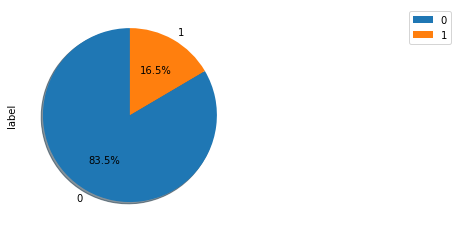

In [12]:
df['label'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,startangle=90)
plt.legend(bbox_to_anchor=(1, 0, 1, 1))
plt.show()

In [13]:
df['message_length']=df['message'].str.len()
df.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  message_length  
0  content - length : 3386 apple-iss research cen...      0            2856  
2  i am posting this inquiry for sergei atamas ( ...      0            1435  
3  a colleague and i are researching the differin...      0             324  
4  earlier this morning i was on the phone with a...      0            1046  
5  content - length : 4437 call for papers is the...      0            4492

In [14]:
df['subject_length']=df['subject'].str.len()
df.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  message_length  \
0  content - length : 3386 apple-iss research cen...      0            2856   
2  i am posting this inquiry for sergei atamas ( ...      0            1435   
3  a colleague and i are researching the differin...      0             324   
4  earlier this morning i was on the phone with a...      0            1046   
5  content - length : 4437 call for papers is the...      0            4492   

   subject_length  
0              39  
2              50  
3               4  
4              24  
5              51

message column reg experience

In [15]:
#replace email address with email
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                         'emailaddress')
#replace urls with webaddress
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                         'webaddress')

#replace money symbols with moneysymb
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')

#replace 10 digit phone numbers
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[/d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')
#replace numbers with nmbr
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?','nmbr')

In [16]:
# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]',' ')

#replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+',' ')

#remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$',' ')

In [17]:
df

subject  \
0               job posting - apple-iss research center   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
5     call for abstracts : optimality in syntactic t...   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  \
0     content length nmbr apple iss research center ...      0   
2     i am posting this inquiry for sergei atamas sa...      0   
3     a colleague and i are researching the differin...      0   
4     earlier this morning i was on the phone with a...      0   
5     content length nmbr call for papers is the bes...      0   
...                                                 ...    ...   
2888  hello thanks for stopping by we have taken man...      1   
2889  the list owner of kiddin has invited you to jo...      1   
2890  judging from the return post i must have sound...      0   
2891  gotcha there are two separate fallacies in the...      0   
2892  hello i m working on a thesis concerning attit...      0   

      message_length  subject_length  
0               2856              39  
2               1435              50  
3                324               4  
4               1046              24  
5               4492              51  
...              ...             ...  
2888             262              28  
2889            2163              34  
2890            1039              34  
2891            2949              54  
2892             700              36  

[2831 rows x 5 columns]

subject column reg experience

In [18]:
#replace email address with email
df['subject'] = df['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                         'emailaddress')
#replace urls with webaddress
df['subject'] = df['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                         'webaddress')

#replace money symbols with moneysymb
df['subject'] = df['subject'].str.replace(r'£|\$', 'dollers')

#replace 10 digit phone numbers
df['subject'] = df['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[/d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')
#replace numbers with nmbr
df['subject'] = df['subject'].str.replace(r'\d+(\.\d+)?','nmbr')

In [19]:
# remove punctuation
df['subject'] = df['subject'].str.replace(r'[^\w\d\s]',' ')

#replace whitespace between terms with a single space
df['subject'] = df['subject'].str.replace(r'\s+',' ')

#remove leading and trailing whitespace
df['subject'] = df['subject'].str.replace(r'^\s+|\s+?$',' ')

In [20]:
df

subject  \
0                 job posting apple iss research center   
2      query letter frequencies for text identification   
3                                                  risk   
4                              request book information   
5     call for abstracts optimality in syntactic theory   
...                                                 ...   
2888                         love your profile ysuolvpv   
2889                 you have been asked to join kiddin   
2890                   anglicization of composers names   
2891   re nmbr nmbr comparative method n ary comparison   
2892                   re american english in australia   

                                                message  label  \
0     content length nmbr apple iss research center ...      0   
2     i am posting this inquiry for sergei atamas sa...      0   
3     a colleague and i are researching the differin...      0   
4     earlier this morning i was on the phone with a...      0   
5     content length nmbr call for papers is the bes...      0   
...                                                 ...    ...   
2888  hello thanks for stopping by we have taken man...      1   
2889  the list owner of kiddin has invited you to jo...      1   
2890  judging from the return post i must have sound...      0   
2891  gotcha there are two separate fallacies in the...      0   
2892  hello i m working on a thesis concerning attit...      0   

      message_length  subject_length  
0               2856              39  
2               1435              50  
3                324               4  
4               1046              24  
5               4492              51  
...              ...             ...  
2888             262              28  
2889            2163              34  
2890            1039              34  
2891            2949              54  
2892             700              36  

[2831 rows x 5 columns]

In [21]:
# remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['message'] = df['message'].apply(lambda x: ' '.join(
  term for term in x.split() if term not in stop_words))

In [22]:
#cleaning message column and its length
df['clean_message_len'] = df['message'].str.len()
df

subject  \
0                 job posting apple iss research center   
2      query letter frequencies for text identification   
3                                                  risk   
4                              request book information   
5     call for abstracts optimality in syntactic theory   
...                                                 ...   
2888                         love your profile ysuolvpv   
2889                 you have been asked to join kiddin   
2890                   anglicization of composers names   
2891   re nmbr nmbr comparative method n ary comparison   
2892                   re american english in australia   

                                                message  label  \
0     content length nmbr apple iss research center ...      0   
2     posting inquiry sergei atamas satamas umabnet ...      0   
3     colleague researching differing degrees risk p...      0   
4     earlier morning phone friend mine living south...      0   
5     content length nmbr call papers best good enou...      0   
...                                                 ...    ...   
2888  hello thanks stopping taken many new pics made...      1   
2889  list owner kiddin invited join mailing list li...      1   
2890  judging return post must sounded like kind sel...      0   
2891  gotcha two separate fallacies argument n ary c...      0   
2892  hello working thesis concerning attitudes towa...      0   

      message_length  subject_length  clean_message_len  
0               2856              39               2166  
2               1435              50               1044  
3                324               4                210  
4               1046              24                629  
5               4492              51               3331  
...              ...             ...                ...  
2888             262              28                132  
2889            2163              34               1213  
2890            1039              34                643  
2891            2949              54               1842  
2892             700              36                430  

[2831 rows x 6 columns]

In [23]:
#lets do same to subject column
df['subject'] = df['subject'].apply(lambda x: ' '.join(
 term for term in x.split() if term not in stop_words))

In [24]:
df['clean_subject_len']=df['subject'].str.len()
df

subject  \
0             job posting apple iss research center   
2      query letter frequencies text identification   
3                                              risk   
4                          request book information   
5        call abstracts optimality syntactic theory   
...                                             ...   
2888                          love profile ysuolvpv   
2889                              asked join kiddin   
2890                  anglicization composers names   
2891  nmbr nmbr comparative method n ary comparison   
2892                     american english australia   

                                                message  label  \
0     content length nmbr apple iss research center ...      0   
2     posting inquiry sergei atamas satamas umabnet ...      0   
3     colleague researching differing degrees risk p...      0   
4     earlier morning phone friend mine living south...      0   
5     content length nmbr call papers best good enou...      0   
...                                                 ...    ...   
2888  hello thanks stopping taken many new pics made...      1   
2889  list owner kiddin invited join mailing list li...      1   
2890  judging return post must sounded like kind sel...      0   
2891  gotcha two separate fallacies argument n ary c...      0   
2892  hello working thesis concerning attitudes towa...      0   

      message_length  subject_length  clean_message_len  clean_subject_len  
0               2856              39               2166                 37  
2               1435              50               1044                 44  
3                324               4                210                  4  
4               1046              24                629                 24  
5               4492              51               3331                 42  
...              ...             ...                ...                ...  
2888             262              28                132                 21  
2889            2163              34               1213                 17  
2890            1039              34                643                 29  
2891            2949              54               1842                 45  
2892             700              36                430                 26  

[2831 rows x 7 columns]

In [25]:
print('message original length:',df['message_length'].sum())
print('message clean length:',df['clean_message_len'].sum())

message original length: 9186422
message clean length: 6565477


In [26]:
print('subject original length:',df['subject_length'].sum())
print('subject clean length:',df['clean_subject_len'].sum())

subject original length: 91663
subject clean length: 77256


In [27]:
import plotly.express as px
fig = px.pie(df, values='message_length', names='label')
fig.show()

message length before cleaning

In [28]:
fig = px.pie(df, values='clean_message_len', names='label')
fig.show()

message length after cleaning

In [29]:
fig = px.pie(df, values='subject_length', names='label')
fig.show()

subject length before cleaning

In [30]:
fig = px.pie(df, values='clean_subject_len', names='label')
fig.show()

subject length after cleaning

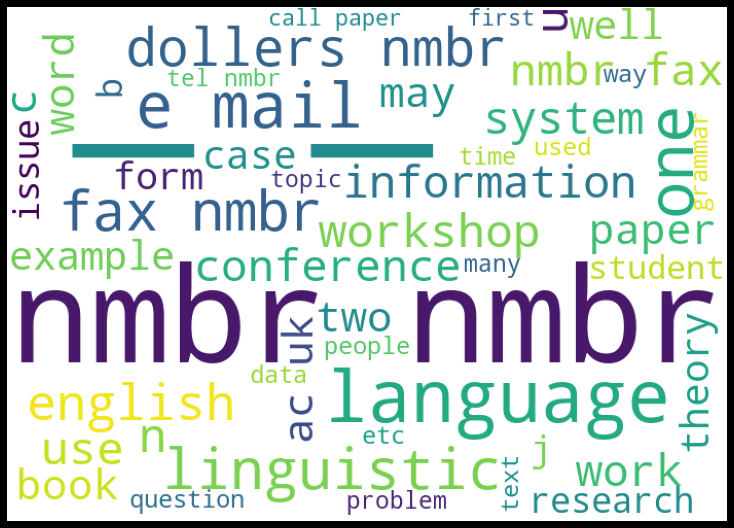

In [31]:
# loud words in ham
from wordcloud import WordCloud

ham = df['message'][df['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(ham))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Message ham loud words

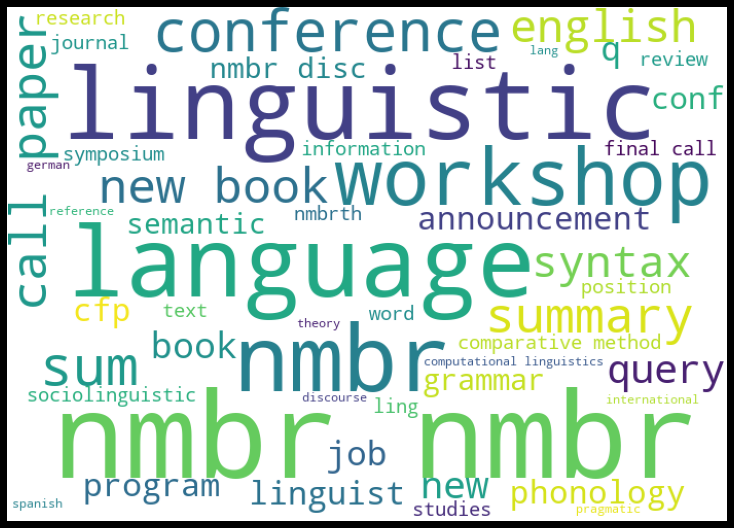

In [32]:
ham_sub = df['subject'][df['label']==0]

ham_cloud_sub = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(ham_sub))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud_sub)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

subject ham loud words

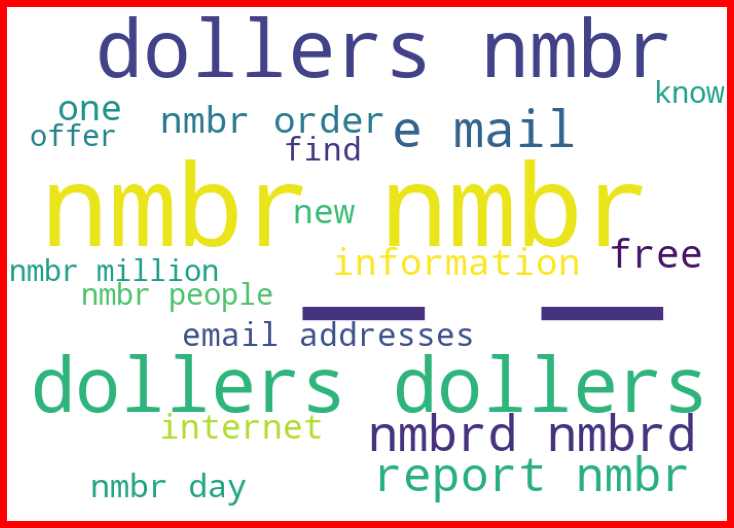

In [33]:
spam = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spam))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

message spam loud words

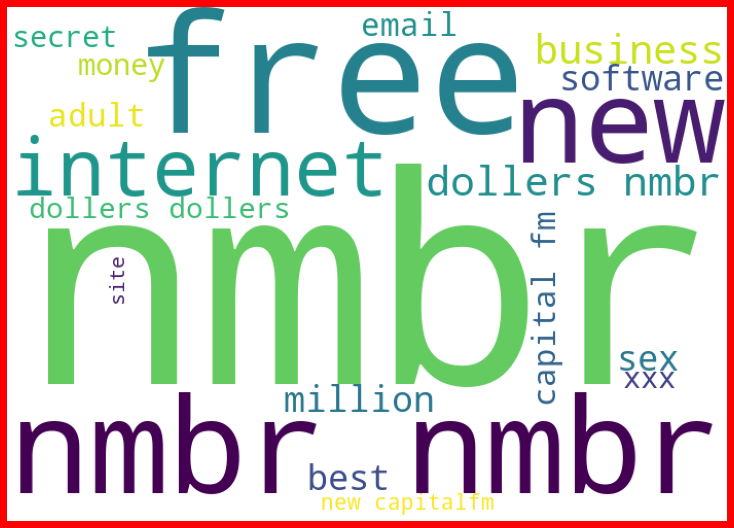

In [34]:
spam_sub = df['subject'][df['label']==1]

spam_cloud_sub = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spam_sub))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud_sub)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

subject spam loud words

In [35]:
# converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

feature = tf_vec.fit_transform(df['message'],df['subject'])

In [36]:
#splitting the data
from sklearn.model_selection import train_test_split,cross_val_score

x = feature
y = df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [38]:
mn=MultinomialNB()
sv=SVC()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [39]:
models = []
models.append(('MultinomialNB',mn))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))

*************************** MultinomialNB ***************************


MultinomialNB()


AccuracyScore= 0.865819209039548


classification_report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       591
           1       1.00      0.19      0.32       117

    accuracy                           0.87       708
   macro avg       0.93      0.59      0.62       708
weighted avg       0.88      0.87      0.82       708



[[591   0]
 [ 95  22]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC ***************************


SVC()


AccuracyScore= 0.9745762711864406


classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       591
           1       1.00      0.85      0.92       117

    accuracy                           0.97       708
   macro avg       0.99      0.92      0.95       708
weighted avg       0.98      0.97      0.97       7

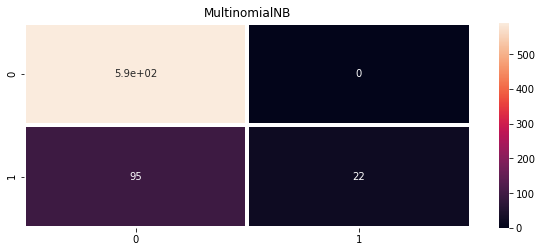

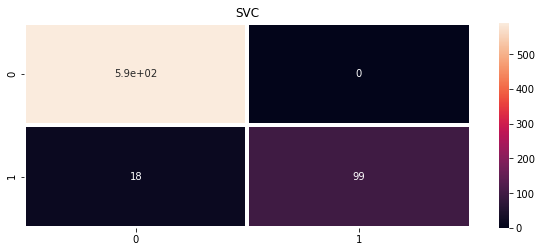

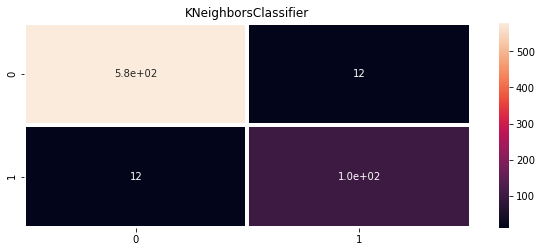

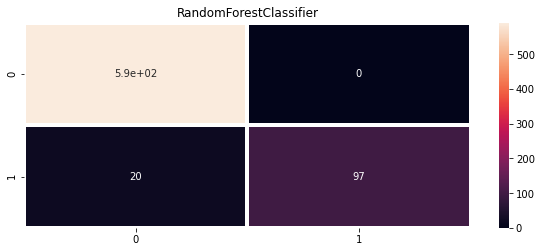

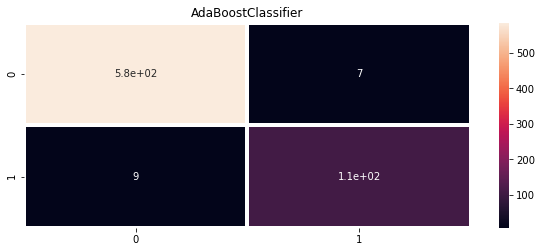

In [40]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('***************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('AccuracyScore=',AS)
    score.append(AS*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,linewidths=3,linecolor='w'))
    print('\n\n')

In [41]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score})
result

Model  Accuracy_score
0           MultinomialNB       86.581921
1                     SVC       97.457627
2    KNeighborsClassifier       96.610169
3  RandomForestClassifier       97.175141
4      AdaBoostClassifier       97.740113

I am choosing AdaBoostClassifier based on accuracy score and confusion matrix,f1score

In [42]:
#PREDICT THE VALUES
pred=ad.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 

In [43]:
# saving result
from joblib import dump,load
dump(df,'email spam detection.joblib')

['email spam detection.joblib']